# Intro to Python Projects

## Module 5 Project 1 ~ Intro to API

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from nba_api.stats.static import teams

nba_teams = teams.get_teams()
df_teams = pd.DataFrame(nba_teams)
print(df_teams.head())

df_warriors = df_teams[df_teams['nickname']=='Warriors']
print(df_warriors)
id_warriors = df_warriors['id'].values[0]
print(id_warriors)

           id             full_name abbreviation   nickname         city  \
0  1610612737         Atlanta Hawks          ATL      Hawks      Atlanta   
1  1610612738        Boston Celtics          BOS    Celtics       Boston   
2  1610612739   Cleveland Cavaliers          CLE  Cavaliers    Cleveland   
3  1610612740  New Orleans Pelicans          NOP   Pelicans  New Orleans   
4  1610612741         Chicago Bulls          CHI      Bulls      Chicago   

           state  year_founded  
0        Georgia          1949  
1  Massachusetts          1946  
2           Ohio          1970  
3      Louisiana          2002  
4       Illinois          1966  
           id              full_name abbreviation  nickname          city  \
7  1610612744  Golden State Warriors          GSW  Warriors  Golden State   

        state  year_founded  
7  California          1946  
1610612744


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.static import teams

nba_teams = teams.get_teams()
df_teams = pd.DataFrame(nba_teams)
df_warriors = df_teams[df_teams['nickname']=='Warriors']
id_warriors = df_warriors['id'].values[0]

def one_dict(list_dict):
    keys=list_dict[0].keys()
    out_dict={key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict

gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)
games = gamefinder.get_data_frames()
print(games)

[     SEASON_ID     TEAM_ID TEAM_ABBREVIATION              TEAM_NAME  \
0        22025  1610612744               GSW  Golden State Warriors   
1        22025  1610612744               GSW  Golden State Warriors   
2        22025  1610612744               GSW  Golden State Warriors   
3        22025  1610612744               GSW  Golden State Warriors   
4        22025  1610612744               GSW  Golden State Warriors   
...        ...         ...               ...                    ...   
3816     21983  1610612744               GOS  Golden State Warriors   
3817     21983  1610612744               GOS  Golden State Warriors   
3818     21983  1610612744               GOS  Golden State Warriors   
3819     21983  1610612744               GOS  Golden State Warriors   
3820     21983  1610612744               GOS  Golden State Warriors   

         GAME_ID   GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_PCT  OREB  \
0     1522500071  2025-07-19  GSW vs. CLE  W  201   82  ...   0.625  

AVE +/- Home:  3.730769230769231
AVE +/- Away:  -0.6071428571428571


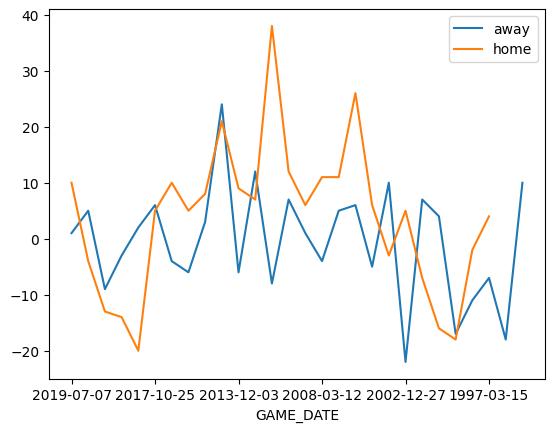

In [17]:
import requests

filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl"

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

download(filename, "Golden_State.pkl")

file_name = "Golden_State.pkl"
games = pd.read_pickle(file_name)

games_home=games[games['MATCHUP']=='GSW vs. TOR']
games_away=games[games['MATCHUP']=='GSW @ TOR']
print('AVE +/- Home: ', games_home['PLUS_MINUS'].mean())
print('AVE +/- Away: ', games_away['PLUS_MINUS'].mean())

fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()

AVE +/- Home:  4.006635071090048
AVE +/- Away:  -3.0101790763430727
AVE Points Home:  104.76829268292683
AVE Points Away:  101.12593283582089


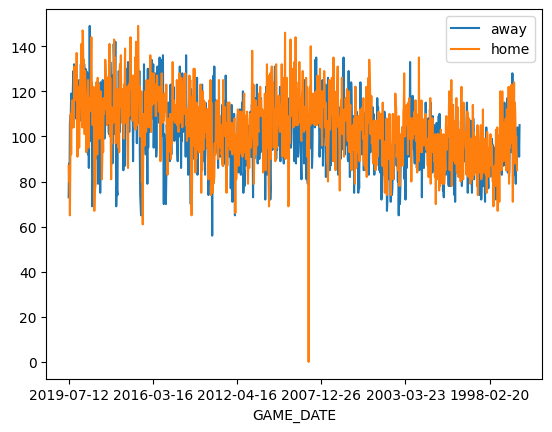

In [23]:
file_name = "Golden_State.pkl"
games = pd.read_pickle(file_name)

games_home=games[games['MATCHUP'].str.contains('GSW vs')]
games_away=games[games['MATCHUP'].str.contains('GSW @')]
print('AVE +/- Home: ', games_home['PLUS_MINUS'].mean())
print('AVE +/- Away: ', games_away['PLUS_MINUS'].mean())
print('AVE Points Home: ', games_home['PTS'].mean())
print('AVE Points Away: ', games_away['PTS'].mean())

fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PTS', ax=ax)
games_home.plot(x='GAME_DATE',y='PTS', ax=ax)
ax.legend(["away", "home"])
plt.show()

## Module 5 Project 2 ~ Rest APIs and HTTP Requests

In [7]:
import requests

url_get = 'http://httpbin.org/get'
payload={'name':'Joseph', 'ID':'123'}

r = requests.get(url_get, params=payload)
print(r.url)
print(r.request.body)
print(r.status_code)
print(r.headers['Content-Type'])
print(r.text[0:100])
r_json = r.json()
print(r_json)
print(r_json['args'])


http://httpbin.org/get?name=Joseph&ID=123
None
200
application/json
{
  "args": {
    "ID": "123", 
    "name": "Joseph"
  }, 
  "headers": {
    "Accept": "*/*", 
    
{'args': {'ID': '123', 'name': 'Joseph'}, 'headers': {'Accept': '*/*', 'Accept-Encoding': 'gzip, deflate', 'Host': 'httpbin.org', 'User-Agent': 'python-requests/2.32.5', 'X-Amzn-Trace-Id': 'Root=1-68d5b08a-23875fbf27fdcbd35f9979ca'}, 'origin': '69.222.117.34', 'url': 'http://httpbin.org/get?name=Joseph&ID=123'}
{'ID': '123', 'name': 'Joseph'}


In [10]:
import requests

url_post = 'http://httpbin.org/post'
payload={'name':'Joseph', 'ID':'123'}

r = requests.post(url_post, data=payload)
print('POST request URL:', r.url)
print(r.request.body)
print(r.status_code)
print(r.json()['form'])


POST request URL: http://httpbin.org/post
name=Joseph&ID=123
200
{'ID': '123', 'name': 'Joseph'}


## Module 5 Project 3 ~ Advanced API work

In [19]:
import requests
from bs4 import BeautifulSoup
# Specify the URL of the webpage you want to scrape
url = 'https://www.ibm.com/'
# Send an HTTP GET request to the webpage
response = requests.get(url)
print(response.status_code)
# Store the HTML content in a variable
html_content = response.text
# Create a BeautifulSoup object to parse the HTML
soup = BeautifulSoup(html_content, 'html.parser')
# Display a snippet of the HTML content
print('HTML Content: ------------------------')
print(html_content[0:500])

print('Links: ------------------------')
# Find all <a> tags (anchor tags) in the HTML
links = soup.find_all('a')
# Iterate through the list of links and print their text
for link in links:
    print(link.text)

200
HTML Content: ------------------------

<!DOCTYPE HTML>
<html lang="en">
<head>
    
    
    
    
    
    
    
      
    
    
    
    
    <meta charset="UTF-8"/>
    <meta name="languageCode" content="en"/>
    <meta name="countryCode" content="us"/>
    <meta name="searchTitle" content="IBM"/>
    <meta name="focusArea" content="Cross IBM SDRs"/>
    <meta name="siteSection" content="home"/>
    <title>IBM</title>
      <script defer="defer" type="text/javascript" src="https://rum.hlx.page/.rum/@adobe/hel
Links: ------------------------


Become a smarter business




Grow operations with agentic AI






























Join IBM’s dev conference for labs, skills and certifications







Get the IBM® Granite® Cookbook








Explore AI courses, APIs, data sets and more







Maximize ROI through smarter governance







New OpenAI open-source models now available on watsonx.ai®







See why Granite Vision tops the SLMs chart in doc understanding







Forres

In [ ]:
import os 
from PIL import Image
from IPython.display import IFrame

url='https://www.ibm.com/'
r=requests.get(url)

print('Access website:', url)
print('Status Code:', r.status_code)
print('Request Headers:')
for header in r.request.headers:
    print('\t', header, '~', r.request.headers[header])
print('Request Body:')
print(r.request.body)
print('Encoding:', r.encoding)
print('Text Sample', r.text[0:50])


Access website: https://www.ibm.com/
Status Code: 200
Request Headers:
	 User-Agent ~ python-requests/2.32.5
	 Accept-Encoding ~ gzip, deflate
	 Accept ~ */*
	 Connection ~ keep-alive
	 Cookie ~ _abck=723BDAE8A51AC9371B3B0D5E4941753A~-1~YAAQivkpF0NkSVKZAQAAW9r3hg50K8sRvUFeAvvM/7dw+DUFZrByb/WkuLpNpuL/hbfPj+j4Dr70wvD0QStjnqzzSqtKZbT8Ja6MVHo+RqweHSuCWBtGaITSMA9zthsHEPBy3KW0fhMvh3fg4bfIlW2ItLPIrfGoSPaqRPWNECPKSJ6hg30jkiChKqGxGfY7FQ0LTzWCuuDHxOXtYlgM66QApq+RfmReNtrc1pvqL6ui2yBIGpCa67SjtwgEGjAnr7rIbXV6x8H0Z8MvFAJD/W+YEl81TAg0kkYn+LakoADMMWDRo4FcAbof+BKJIXEVaDMYhSyDFH9QugzRiDpelUAjevJi3rug7jZM8quofFDpBLP8oW8ZpMx9spjoXXf7586/mvWWfmvMHlbQlnE/c3/ZH3HMHX2/bE7U1FZzo6mQhTI5Mww0iEcEGHYWsnNBbLA=~-1~-1~-1~-1~-1; bm_sz=29E718D73C59DF4CF2FBFEEE3ED94483~YAAQivkpF0RkSVKZAQAAW9r3hh0XcxitEqZbeGcp2JA1rZUVZ//dWv72nhfE3olc2eo77rqgs/EL6YOOE44BRkxJrqkAmTYM32ebo5E0ox5JVV9M+kghOYvJ1UK0PP+NrRuyC45FNg/JQzQYQ0ak3jFOWyE9SVVVwSlc0HE6/a5XTApNaD58HGaAbpretug67aT+Ncy1bsPNVcdS9FPs4IZdDuEh+Klo0Gm+huPB0scNGuIn0sT9DCWErLc0npE

UnidentifiedImageError: cannot identify image file 'c:\\code\\dataScienceCertification\\image.png'

Access website: https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/IDSNlogo.png
Status Code: 200
Request Headers:
	 Date ~ Fri, 26 Sep 2025 17:09:16 GMT
	 X-Clv-Request-Id ~ 885b0403-1657-4337-ad32-e77b8ee8c2c3
	 Server ~ Cleversafe
	 X-Clv-S3-Version ~ 2.5
	 Accept-Ranges ~ bytes
	 x-amz-request-id ~ 885b0403-1657-4337-ad32-e77b8ee8c2c3
	 ETag ~ "8bb44578fff8fdcc3d2972be9ece0164"
	 Content-Type ~ image/png
	 Last-Modified ~ Wed, 16 Nov 2022 03:32:41 GMT
	 Content-Length ~ 78776
Content Type: image/png
Request Body:
None
Encoding: None
Text Sample �PNG

IHDR  X     2��G   	pHYs  %  %


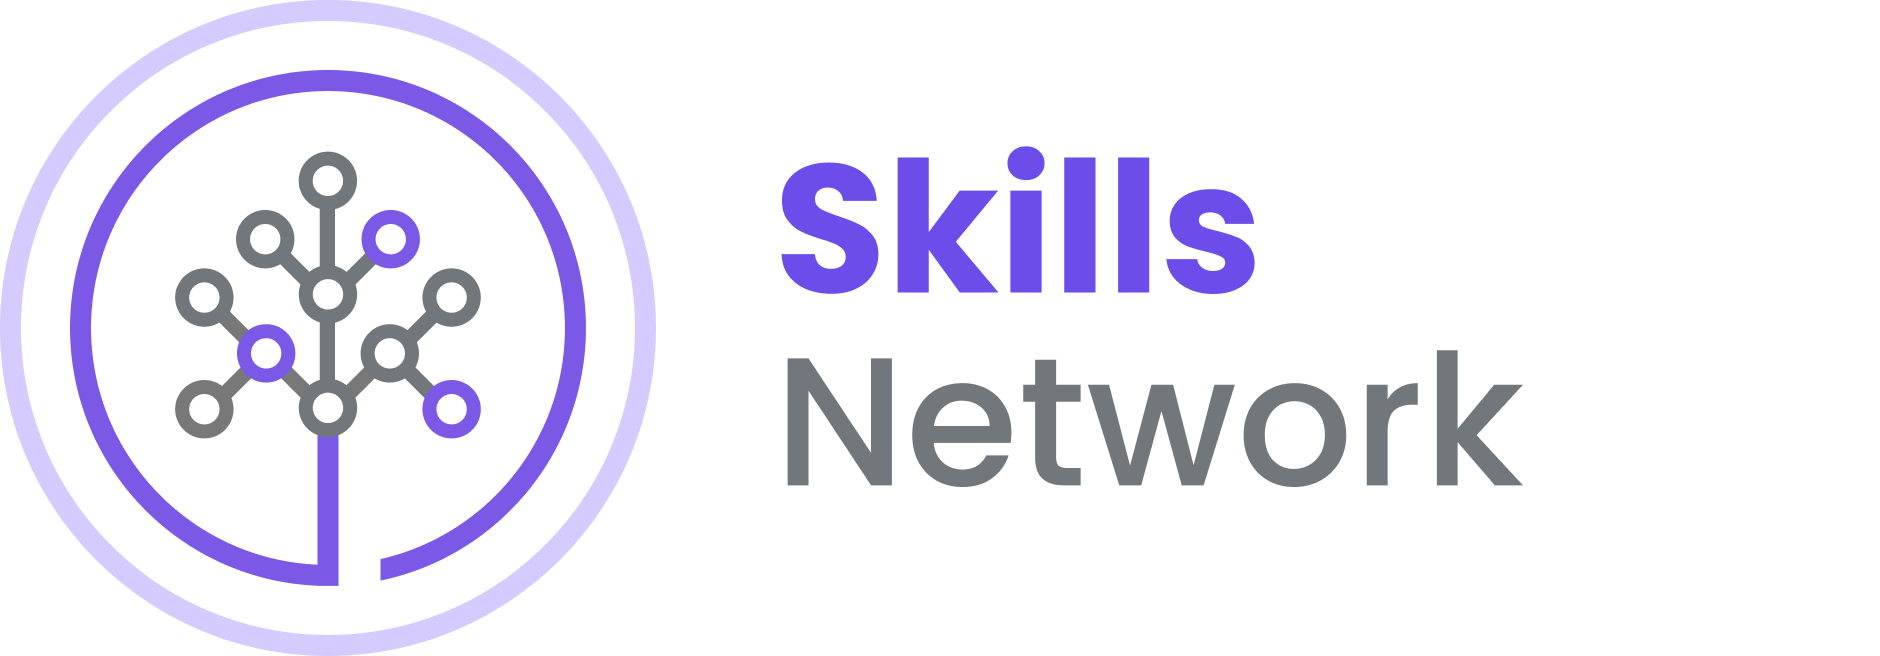

In [39]:
import os 
from PIL import Image
from IPython.display import IFrame

url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/IDSNlogo.png'
r=requests.get(url)

print('Access website:', url)
print('Status Code:', r.status_code)
print('Request Headers:')
for header in r.headers:
    print('\t', header, '~', r.headers[header])
print('Content Type:', r.headers['Content-Type'])
print('Request Body:')
print(r.request.body)
print('Encoding:', r.encoding)
print('Text Sample', r.text[0:50])
path = os.path.join(os.getcwd(), 'image.png')
with open(path, 'wb') as f:
    f.write(r.content)

Image.open(path)

In [ ]:
import os 

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/Example1.txt'
r=requests.get(URL)

print('Access website:', URL)
print('Status Code:', r.status_code)
print('Request Headers:')
for header in r.headers:
    print('\t', header, '~', r.headers[header])
print('Content Type:', r.headers['Content-Type'])
print('Request Body:', r.request.body)
print('Encoding:', r.encoding)
print('Text Sample', r.text[0:50])
path = os.path.join(os.getcwd(), 'web_scrape_text.txt')
with open(path, 'w') as f:
    f.write(r.text)


Access website: https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/Example1.txt
Status Code: 200
Request Headers:
	 Date ~ Fri, 26 Sep 2025 17:12:39 GMT
	 X-Clv-Request-Id ~ a9d89018-8231-4aa1-a1b0-b494e6ef4cf6
	 Server ~ Cleversafe
	 X-Clv-S3-Version ~ 2.5
	 Accept-Ranges ~ bytes
	 x-amz-request-id ~ a9d89018-8231-4aa1-a1b0-b494e6ef4cf6
	 Cache-Control ~ max-age=0,public
	 ETag ~ "522bc63a850f3569b8924c51131d5fe4"
	 Content-Type ~ text/plain
	 Last-Modified ~ Wed, 12 Oct 2022 22:36:17 GMT
	 Content-Length ~ 45
Content Type: text/plain
Request Body:
None
Encoding: ISO-8859-1
Text Sample This is line 1 
This is line 2
This is line 3


In [ ]:
URL = 'http://httpbin.org/get'
payload = {'name': 'Joseph',
           'ID': 123
           }
r=requests.get(URL, params=payload)
print('Access website:', r.url)
print('Status Code:', r.status_code)
print('Request Body:', r.request.body)
print('Encoding:', r.encoding)
print('Request Headers:')
for header in r.headers:
    print('\t', header, '~', r.headers[header])
print('Text Sample:', r.text[0:50])
req_json = r.json()
print('json as dict:', req_json)
print('json args:', req_json['args'])


get_URL = 'http://httpbin.org/get?name=Joseph&ID=123'
r_get = requests.get(get_URL)
print('Access website:', r_get.url)
print('Status Code:', r_get.status_code)

Access website: http://httpbin.org/get?name=Joseph&ID=123
Status Code: 200
Request Body: None
Encoding: utf-8
Request Headers:
	 Date ~ Fri, 26 Sep 2025 17:44:55 GMT
	 Content-Type ~ application/json
	 Content-Length ~ 367
	 Connection ~ keep-alive
	 Server ~ gunicorn/19.9.0
	 Access-Control-Allow-Origin ~ *
	 Access-Control-Allow-Credentials ~ true
Text Sample: {
  "args": {
    "ID": "123", 
    "name": "Josep
json as dict: {'args': {'ID': '123', 'name': 'Joseph'}, 'headers': {'Accept': '*/*', 'Accept-Encoding': 'gzip, deflate', 'Host': 'httpbin.org', 'User-Agent': 'python-requests/2.32.5', 'X-Amzn-Trace-Id': 'Root=1-68d6d10f-2b6e3163790de54d15a68eaa'}, 'origin': '69.222.117.34', 'url': 'http://httpbin.org/get?name=Joseph&ID=123'}
json args: {'ID': '123', 'name': 'Joseph'}
Access website: http://httpbin.org/get?name=Joseph&ID=123
Status Code: 200


In [57]:
URL ='http://httpbin.org/post'
payload = {'name': 'Joseph',
           'ID': 123
           }
r=requests.post(URL, params=payload)
print('Access website:', r.url)
print('Status Code:', r.status_code)
print('Request Body:', r.request.body)
print('Encoding:', r.encoding)
print('Request Headers:')
for header in r.headers:
    print('\t', header, '~', r.headers[header])
print('Text Sample:', r.text[0:50])
req_json = r.json()
print('json as dict:', req_json)
print('json form:', req_json['form'])

Access website: http://httpbin.org/post?name=Joseph&ID=123
Status Code: 200
Request Body: None
Encoding: utf-8
Request Headers:
	 Date ~ Fri, 26 Sep 2025 17:56:56 GMT
	 Content-Type ~ application/json
	 Content-Length ~ 459
	 Connection ~ keep-alive
	 Server ~ gunicorn/19.9.0
	 Access-Control-Allow-Origin ~ *
	 Access-Control-Allow-Credentials ~ true
Text Sample: {
  "args": {
    "ID": "123", 
    "name": "Josep
json as dict: {'args': {'ID': '123', 'name': 'Joseph'}, 'data': '', 'files': {}, 'form': {}, 'headers': {'Accept': '*/*', 'Accept-Encoding': 'gzip, deflate', 'Content-Length': '0', 'Host': 'httpbin.org', 'User-Agent': 'python-requests/2.32.5', 'X-Amzn-Trace-Id': 'Root=1-68d6d3e8-3e3e093947821cc903527499'}, 'json': None, 'origin': '69.222.117.34', 'url': 'http://httpbin.org/post?name=Joseph&ID=123'}
json form: {}


None
c:\code\dataScienceCertification
Error deleting C:\code\dataScienceCertification\images\Ricardo_Bennett.jpg: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\code\\dataScienceCertification\\images\\Ricardo_Bennett.jpg'
Cleared Image Folder: False
Name: Ottmar Petri


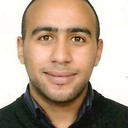

Name: Dominic Mackay


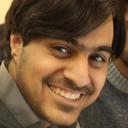

Name: Igor Jesus


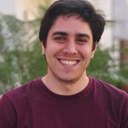

Name: Brennan Bailey


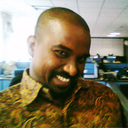

Name: Willie Wells


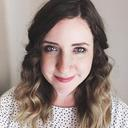

             Name  Gender         City                State  \
0    Ottmar Petri    male     Mannheim  Nordrhein-Westfalen   
1  Dominic Mackay    male  South River             Manitoba   
2      Igor Jesus    male    Barreiras                 Acre   
3  Brennan Bailey    male       Albany      South Australia   
4    Willie Wells  female       Orange      New South Wales   

                        Email                       DOB  \
0    ottmar.petri@example.com  1991-01-29T12:52:34.468Z   
1  dominic.mackay@example.com  1963-06-24T05:46:07.852Z   
2      igor.jesus@example.com  1982-09-12T23:26:18.355Z   
3  brennan.bailey@example.com  1950-03-11T01:45:40.265Z   
4    willie.wells@example.com  1953-01-12T13:34:52.179Z   

                                            Picture  
0    https://randomuser.me/api/portraits/men/87.jpg  
1    https://randomuser.me/api/portraits/men/39.jpg  
2    https://randomuser.me/api/portraits/men/47.jpg  
3    https://randomuser.me/api/portraits/men/63.jp

In [23]:
from randomuser import RandomUser
import requests
import pandas as pd
import os
from IPython.display import IFrame, Image, display

# Import Path
import sys
print(sys.path.append(r'C:\\Code\\Python\\HelperFunctions'))
from helperFunctions import delete_folder_content

def user_dataframe(raw_users):
    users =[]
    try: 
        for user in raw_users:
            users.append({"Name":user.get_full_name(),"Gender":user.get_gender(),"City":user.get_city(),"State":user.get_state(),"Email":user.get_email(), "DOB":user.get_dob(),"Picture":user.get_picture()})
        return pd.DataFrame(users)     
    except Exception as e:
        print('An error has occured:', e)
        return None  

user_num = 5

r = RandomUser()
some_list = r.generate_users(user_num)
df = user_dataframe(some_list)
print(os.getcwd())
delete_status = delete_folder_content('C:\code\dataScienceCertification\images')
print('Cleared Image Folder:', delete_status)
os.chdir('images')
try:
    for user in some_list:
        filename = user.get_full_name().replace(' ', '_') + '.jpg'
        print('Name:', user.get_full_name())
        r = requests.get(user.get_picture())
        if r.status_code == 200:
            with open (filename, 'wb') as f:
                f.write(r.content)
        else:
            print('Error Status Code:', r.status_code)
        display(Image(filename=os.getcwd() + '\\' + filename))
except Exception as e:
    print('Error has occured:', e)
finally:
    os.chdir('..')

print(df.head(user_num))
    


In [37]:
import requests
import json
import math
import pandas as pd

# print('Normalized Json:')
# print(df_normalized)

class Ingredients(object):
    def __init__(self, dataframe):
        self.dataframe = dataframe
        self.ingredients = dataframe['name']
        self.ingredientsprint = ''
    
    def get_ingredient_list(self, ingredientsPerLine):
        num_ingredients = len(self.dataframe['name'])
        max_str = 0
        tabchar = 5.5
        sortedlist = self.dataframe.sort_values(by='name')['name']
        sortedlist = sortedlist.reset_index(drop=True)
        for ingredient in sortedlist:
            if len(ingredient) > max_str:
                max_str = len(ingredient)
        print(max_str)
        index = 0
        while index < num_ingredients:
            outline = ''
            for i in range(ingredientsPerLine):
                try:
                    outline += sortedlist[i+index]
                    divisor = math.floor((max_str - len(sortedlist[i+index])) / tabchar) + 1
                    for i in range(divisor):
                        outline += '\t' 
                except:
                    next
            self.ingredientsprint += outline
            self.ingredientsprint += '\n'
            index += ingredientsPerLine
        self.ingredients = self.ingredients[:-1]
        print(self.ingredientsprint)
    
    def get_nutrition(self, key):
        if type(key) != type('fruit'):
            key = str(key)
        try:
            df_nutrition = self.dataframe.loc[self.dataframe['name']==key]
            output = df_nutrition.iloc[0].to_frame()
            print('Nutrition for', key)
            print(output)
        except TypeError as e:
            print('Error Invalid Input of:', key, '\nDetails:', e)
        except (KeyError, IndexError) as e:
            print('Error Invalid Fruit Input of:', key, '\nDetails:', e)
        except Exception as e:
            print('An Error has occured:', e)


data = requests.get("https://web.archive.org/web/20240929211114/https://fruityvice.com/api/fruit/all")
results = json.loads(data.text)

df_normalized = pd.json_normalize(results)
ingredients = Ingredients(df_normalized)
ingredients.get_ingredient_list(5)
ingredients.get_nutrition('Apple')
ingredients.get_nutrition('Feijoa')
ingredients.get_nutrition('Cucumber')

18
Annona			Apple			Apricot			Avocado			Banana			
Blackberry		Blueberry		Ceylon Gooseberry	Cherry			Cranberry		
Dragonfruit		Durian			Feijoa			Fig			Gooseberry		
Grape			GreenApple		Guava			Hazelnut		Horned Melon		
Jackfruit		Japanese Persimmon	Kiwi			Kiwifruit		Lemon			
Lime			Lingonberry		Lychee			Mango			Mangosteen		
Melon			Morus			Orange			Papaya			Passionfruit		
Peach			Pear			Persimmon		Pineapple		Pitahaya		
Plum			Pomegranate		Pomelo			Pumpkin			Raspberry		
Strawberry		Tangerine		Tomato			Watermelon		

Nutrition for Apple
                                22
name                         Apple
id                               6
family                    Rosaceae
order                      Rosales
genus                        Malus
nutritions.calories             52
nutritions.fat                 0.4
nutritions.sugar              10.3
nutritions.carbohydrates      11.4
nutritions.protein             0.3
Nutrition for Feijoa
                                  33
name                 

In [70]:
import requests
import json
import pandas as pd
import random as rnd
from time import sleep

url = 'https://official-joke-api.appspot.com/jokes/random/451'

class jokester(object):
    def __init__(self, dataset):
        self.dataset = dataset
        self.categories = []
        self.categorylist()

    def categorylist(self):
        categories = self.dataset['type'].unique()
        self.categories.extend(categories)

    def printcategories(self):
        print('Selectable Joke Categories:')
        for category in self.categories:
            print('\t', category)

    def tellmeajoke(self, category=None):
        try:
            if category:
                if type(category) != type('knock-knock'):
                    category = str(category)
                print(category.title() + ' Joke Incoming:')
                df_jokelist = self.dataset[self.dataset['type']==category][['setup','punchline']]
            else:
                print('Random Joke Incoming:')
                df_jokelist = self.dataset[['setup','punchline']]
            df_jokelist = df_jokelist.reset_index(drop=False)
            num_jokes = len(df_jokelist)
            joke_index = rnd.randint(0, num_jokes - 1)
            setup = df_jokelist.loc[joke_index, 'setup']
            punchline = df_jokelist.loc[joke_index, 'punchline']
            print(setup)
            sleep(1)
            print('.')
            sleep(1)
            print('.')
            sleep(1)
            print('.')
            sleep(1)
            print(punchline)
        except (TypeError, KeyError) as e:
            print('Check Cateogry:', category, 'is invalid.')
            print('Details:', e)
        except Exception as e:
            print('Error has occured.')
            print('Details:', e)
        
r = requests.get(url)
print('Status:', r.status_code)
rjson = json.loads(r.text)
df = pd.DataFrame(rjson)
df = df.sort_values(by='id').set_index('id')

jokes = jokester(df)
jokes.printcategories()
jokes.tellmeajoke(category='knock-knock')
jokes.tellmeajoke(category='dad')



Status: 200
Selectable Joke Categories:
	 general
	 knock-knock
	 programming
	 dad
Knock-Knock Joke Incoming:
Knock knock. 
 Who's there? 
 A broken pencil. 
 A broken pencil who?
.
.
.
Never mind. It's pointless.
Dad Joke Incoming:
Why do fathers take an extra pair of socks when they go golfing?
.
.
.
In case they get a hole in one!


## Module 5 Project 4 ~ Web Scraping

In [ ]:
## EXAMPLE SYNTAX

# Beautiful Soup ~ BeautifulSoup is a Python library used for web scraping purposes to pull the data out of HTML and XML files. It creates a parse tree from page source code that can be used to extract data in a hierarchical and more readable manner.
import bs4 as BeautifulSoup
import requests
url = ''
r = requests.get(url)
print('HTTP Status:', r.status_code)
soup = BeautifulSoup(r.content, 'html.parser')

# Scrapy ~ Scrapy is an open-source and collaborative web crawling framework for Python. It is used to extract the data from the website.
import scrapy
class QuotesSpider(scrapy.Spider):
    name = "quotes"
    start_urls = ['http://quotes.toscrape.com/tag/humor/',]
    def parse(self, response):
        for quote in response.css('div.quote'):
            yield {'quote': quote.css('span.text::text').get()}

# Selenium ~ Selenium is a tool used for controlling web browsers through programs and automating browser tasks.
from selenium import webdriver
driver = webdriver.Firefox()
driver.get("http://www.example.com")

In [75]:
# Webscraping HTML using pandas

import pandas as pd
import requests

URL = 'https://en.wikipedia.org/wiki/List_of_largest_banks'
headers = {"User-Agent": "Unnoficial educational activity as part of data science curriculum involving web-scraping exercises"} 
r = requests.get(URL, headers=headers)
print(r.status_code)
tables = pd.read_html(r.text)
df = tables[0]
print(df)

200
    Rank                                Bank name  \
0      1  Industrial and Commercial Bank of China   
1      2               Agricultural Bank of China   
2      3                  China Construction Bank   
3      4                            Bank of China   
4      5                           JPMorgan Chase   
..   ...                                      ...   
95    96                            Handelsbanken   
96    97                 Industrial Bank of Korea   
97    98                                      DNB   
98    99                      Qatar National Bank   
99   100                  National Bank of Canada   

    Total assets (2024) (US$ billion)  
0                             6303.44  
1                             5623.12  
2                             5400.28  
3                             4578.28  
4                             4002.81  
..                                ...  
95                             351.79  
96                             345.81  

C:\Users\Justin King\AppData\Local\Temp\ipykernel_19256\3771896287.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(r.text)


In [77]:
# Webscraping HTML using pandas

import pandas as pd
import requests

URL = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
headers = {"User-Agent": "Unnoficial educational activity as part of data science curriculum involving web-scraping exercises"} 
r = requests.get(URL, headers=headers)
print(r.status_code)
tables = pd.read_html(r.text)
df = tables[2]
print(df)

200
    Country/Territory IMF (2025)[1][6] World Bank (2022–24)[7]  \
0               World        113795678               111326370   
1       United States         30507217                29184890   
2          China[n 1]         19231705                18743803   
3             Germany          4744804                 4659929   
4               India          4187017                 3912686   
..                ...              ...                     ...   
217          Kiribati              312                     308   
218  Marshall Islands              297                     280   
219             Nauru              169                     160   
220        Montserrat                —                       —   
221            Tuvalu               65                      62   

    United Nations (2023)[8]  
0                  100834796  
1                   27720700  
2                   17794782  
3                    4525704  
4                    3575778  
..               

C:\Users\Justin King\AppData\Local\Temp\ipykernel_19256\3490680034.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(r.text)
